# Example: Gene scoring

In case you have not downloaded and imported a reference panel yet, open a terminal and execute in the PascalX/misc folder:

```bash get1KGGRCh38.sh /yourfolder/ EUR```

This command will download and plink convert 1KG project data for the european subpolulation. The data will be stored in ```/yourfolder/```. 

#### Load the gene scorer:

In [1]:
from PascalX import genescorer

Gscorer = genescorer.chi2sum(window=50000,varcutoff=0.95)

#### Load the reference panel into the genescorer:


In [2]:
Gscorer.load_refpanel('/yourfolder/EUR.1KGphase3.GRCh38',parallel=1)


The first time this command is executed for a reference panel, an internal SNP database will be generated on disk. This process may take several hours. You can use the ```parallel=``` option to speed up via parallelization. Subsequent calls of this method will be very fast.

#### Load a gene annotation:

If you do not have a gene annotation yet, you can download automatically from BioMart via

In [3]:
from PascalX.genome import genome

G = genome()
G.get_ensembl_annotation('biomart_GRCh38.tsv')

The annotation will be saved in the file ```biomart_GRCh38.tsv```. 

You still need to load the annotation into the genescorer as follows:

In [4]:
Gscorer.load_genome('biomart_GRCh38.tsv')

19024 active genes


#### Load a GWAS:

In [5]:
Gscorer.load_GWAS("path/gwasfilename",rscol=0,pcol=1,header=False)


32706 SNPs loaded


You can either load a raw text file or gzip compressed with file ending .gz

#### Start the scoring:

To score all genes in the loaded annotation, execute

In [6]:
R = Gscorer.score_all(parallel=1,nobar=False)

[chr1] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr2] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr3] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr4] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr5] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr6] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr7] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr8] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr9] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr10] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr11] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr12] (done          ): 100%|██████████ [ estimated time left: 00:00 ]   
[chr13] (done          ): 100%|██████████ [ estimated time left: 00:00 ] 
[chr14] (done          

The raw results will be stored in ```R```. Use the ```parallel=``` option to increase the number of cpu cores to use (make sure that you have sufficient memory). Note that for ```parallel!=1``` it is recommended to switch off the progress bar via setting ```nobar=True```

The top scored genes can be listed via

In [7]:
Gscorer.get_topscores(N=10)

CSMD1   8.760865247201289e-12
DLGAP1   4.930685669205628e-10
FHIT   4.5914412272196614e-09
PRKG1   1.0511032488835781e-08
KANK1   2.747412212178446e-07
RBFOX1   4.217145447293902e-07
WWOX   4.6248500973344875e-07
KAZN   4.6583393076282675e-07
EYA1   6.217158516896859e-07
KIF26B   7.044764069874532e-07


#### Visualisation:

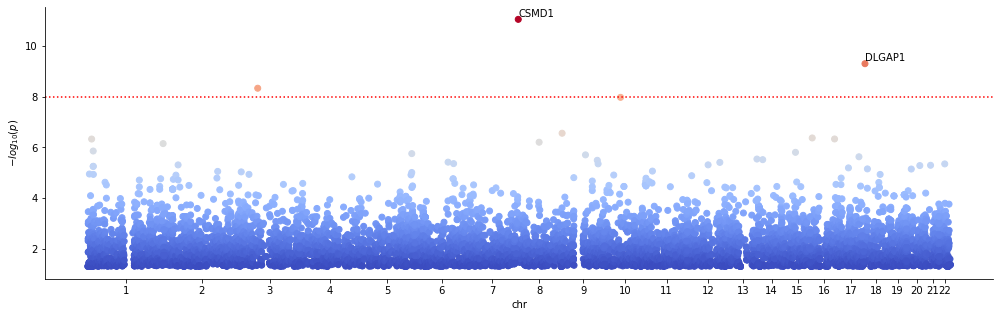

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,5))

Gscorer.plot_Manhattan(R[0],sigLine=1e-8,logsigThreshold=9,labelSig=True)